# Работа №1 - Поиск ассоциативных правил

_Вариант 5. Сформировать набор из 30 транзакций на основе продуктов, употребляемых на завтрак, обед и ужин._

In [1]:
#! echo '[["Мясо", "Соус", "Вино"],["Мясо", "Соус", "Картофель", "Масло"],["Картофель", "Масло"],["Картофель", "Масло"],["Вино", "Яйца", "Бекон"],["Овощи", "Мясо", "Специи"],["Яйца", "Бекон", "Овощи", "Мясо", "Специи"],["Яйца", "Бекон", "Овощи", "Мясо", "Специи"],["Лапша", "Кетчуп"],["Пельмени", "Майонез", "Кетчуп"],["Пельмени", "Майонез", "Кетчуп"],["Овощи", "Пельмени", "Майонез", "Кетчуп"],["Овощи", "Соус", "Вино"],["Кетчуп"],["Кетчуп", "Лапша", "Пельмени", "Майонез"],["Кетчуп", "Лапша", "Пельмени", "Майонез"],["Кетчуп", "Лапша", "Мясо", "Соус", "Вино"],["Овощи", "Мясо", "Соус", "Вино"],["Майонез"],["Вино"],["Овощи", "Масло"],["Овощи", "Масло", "Картофель"],["Овощи", "Масло", "Картофель", "Мясо", "Соус"],["Овощи", "Бекон", "Яйца"],["Бекон", "Яйца"],["Яйца", "Кетчуп", "Лапша"],["Мясо"],["Мясо", "Масло"],["Мясо", "Масло", "Картофель"],["Масло", "Картофель"]]' > data/data_set.json
#! curl https://raw.githubusercontent.com/viktree/curly-octo-chainsaw/master/BreadBasket_DMS.csv > ./data/BreadBasket_DMS.csv
#! pip3 install apriori_python efficient-apriori fpgrowth-py pyarmviz pandas numpy pyarmviz 

In [2]:
from lib import datasets
from pandas import pandas
from fpgrowth_py import fpgrowth
from efficient_apriori import apriori as e_apriori
from apriori_python import apriori as apriori

In [4]:
repo_ds = list(map(lambda x: list(x[1]["Item"]), pandas.read_csv("./data/BreadBasket_DMS.csv").groupby(["Transaction"])))
test_ds = datasets.from_json("./data/data_set.json")

dict_values([{'Bread'}, {'Scandinavian'}, {'Cookies', 'Hot chocolate', 'Jam'}, {'Muffin'}, {'Coffee', 'Pastry', 'Bread'}, {'Medialuna', 'Muffin', 'Pastry'}, {'Medialuna', 'Coffee', 'Pastry', 'Tea'}, {'Pastry', 'Bread'}, {'Muffin', 'Bread'}, {'Medialuna', 'Scandinavian'}, {'Medialuna', 'NONE', 'Bread'}, {'Pastry', 'Tea', 'Jam', 'Tartine', 'Coffee'}, {'Coffee', 'Basket', 'Bread'}, {'Medialuna', 'Pastry', 'Bread'}, {'Mineral water', 'Scandinavian', 'NONE'}, {'Medialuna', 'Coffee', 'Bread'}, {'Hot chocolate'}, {'Farm House'}, {'Farm House', 'Bread'}, {'Medialuna', 'Bread'}, {'Medialuna', 'Coffee', 'Bread'}, {'Jam'}, {'Scandinavian', 'Muffin'}, {'Bread'}, {'Scandinavian'}, {'Fudge'}, {'Scandinavian'}, {'Coffee', 'Bread'}, {'Jam', 'NONE', 'Bread'}, {'Bread'}, {'Basket'}, {'Scandinavian', 'Muffin'}, {'Coffee'}, {'Coffee', 'Muffin'}, {'Scandinavian', 'Muffin'}, {'Tea', 'Bread'}, {'Coffee', 'NONE', 'Bread'}, {'Tea', 'Bread'}, {'Scandinavian'}, {'Muffin', 'Juice', 'Tartine', 'Coffee', 'NONE'}, {

## Формирование баз ассоциативных правил

In [4]:
_, test_rules = apriori(test_ds, minSup=0.15, minConf=0.6)
_, repo_rules_60 = apriori(repo_ds, minSup=0.01, minConf=0.6)
_, repo_rules_80 = apriori(repo_ds, minSup=0.01, minConf=0.8)
repo_rules_60

[[{'Toast'}, {'Coffee'}, 0.7044025157232704]]

In [5]:
_, test_rules_e = e_apriori(test_ds, min_support=0.15, min_confidence=0.6)
_, repo_rules_e_60 = e_apriori(repo_ds, min_support=0.01, min_confidence=0.6)
_, repo_rules_e_80 = e_apriori(repo_ds, min_support=0.01, min_confidence=0.8)
list(map(lambda x: (x, x.confidence), repo_rules_e_60))

[({Toast} -> {Coffee}, 0.7044025157232704)]

In [6]:
_, test_rules_fpg = fpgrowth(test_ds, minSupRatio=0.15, minConf=0.6)
_, repo_rules_fpg_60 = fpgrowth(repo_ds, minSupRatio=0.01, minConf=0.6)
_, repo_rules_fpg_80 = fpgrowth(repo_ds, minSupRatio=0.01, minConf=0.8)
repo_rules_fpg_60

[[{'Toast'}, {'Coffee'}, 0.7044025157232704]]

## Ручные расчёты

In [7]:
from lib import associative_rules
r = associative_rules.compute(test_ds)
r[('Соус', 'Вино')]

{'support': 0.13333333333333333,
 'confidence': 0.6666666666666666,
 'significance': 3.96}

## Визуализация правил

In [12]:
from PyARMViz import PyARMViz
# PyARMViz.metadata_scatter_plot(test_rules_e)
# rules = map(lambda x: PyARMViz.Rule(x.lhs, x.rhs), test_rules_e)
rules = test_rules_e
PyARMViz.metadata_scatter_plot(rules)

## Оценка времени формирования

In [9]:
from time import time
def measure(action):
    start = time()
    result = action()
    end = time()
    return end - start, result

confidence_probes = [ x / 10 for x in range(1, 11, 1) ]
algorithms = [
    lambda conf: lambda: fpgrowth(repo_ds, minSupRatio=0.01, minConf=conf),
    lambda conf: lambda: e_apriori(repo_ds, min_support=0.01, min_confidence=conf),
    lambda conf: lambda: apriori(repo_ds, minSup=0.01, minConf=conf)
]
result = {}
for conf in confidence_probes:
    result[conf] = {}
    for n, algorithm in enumerate(algorithms):
        elapsed, _ = measure(algorithm(conf))
        result[conf][n] = elapsed
result

{0.1: {0: 0.2939944267272949, 1: 0.2970011234283447, 2: 0.30599427223205566},
 0.2: {0: 0.2129974365234375, 1: 0.2932002544403076, 2: 0.2701075077056885},
 0.3: {0: 0.20875120162963867, 1: 0.24999761581420898, 2: 0.29199814796447754},
 0.4: {0: 0.19800019264221191, 1: 0.2551422119140625, 2: 0.27097034454345703},
 0.5: {0: 0.20160460472106934, 1: 0.2619764804840088, 2: 0.2750272750854492},
 0.6: {0: 0.19221043586730957, 1: 0.2510490417480469, 2: 0.2799496650695801},
 0.7: {0: 0.18886113166809082, 1: 0.24803829193115234, 2: 0.2697012424468994},
 0.8: {0: 0.18511652946472168, 1: 0.2898263931274414, 2: 0.2810826301574707},
 0.9: {0: 0.18606042861938477, 1: 0.24657154083251953, 2: 0.27296948432922363},
 1.0: {0: 0.19099688529968262, 1: 0.2520267963409424, 2: 0.27211451530456543}}

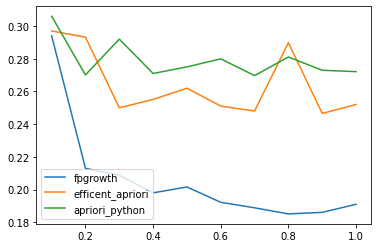

In [10]:
import matplotlib.pyplot as plt
x = confidence_probes
y0 = list(map(lambda conf: result[conf][0] ,result))
y1 = list(map(lambda conf: result[conf][1] ,result))
y2 = list(map(lambda conf: result[conf][2] ,result))
plt.plot(x, y0, label="fpgrowth")
plt.plot(x, y1, label="efficent_apriori")
plt.plot(x, y2, label="apriori_python")
plt.legend()
plt.show()